<a href="https://colab.research.google.com/github/sammy-suyama/PythonBayesianMLBook/blob/main/chapter3/3_3_%E4%B8%80%E8%88%AC%E5%8C%96%E7%B7%9A%E5%BD%A2%E3%83%A2%E3%83%87%E3%83%AB_%E3%83%9D%E3%82%A2%E3%82%BD%E3%83%B3%E5%9B%9E%E5%B8%B0%E3%83%A2%E3%83%87%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title install packages
!pip install watermark
#!pip install pymc3==3.11.4
!pip install pymc3

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az

In [ ]:
sns.set_context('talk', font_scale=0.8)

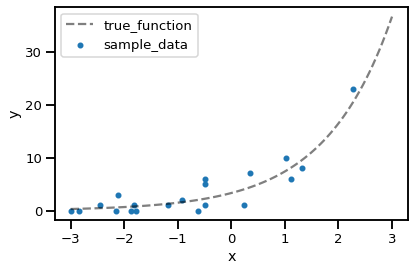

In [ ]:
np.random.seed(1)

# データ数
N = 20

# 真のパラメータ
true_w1 = 0.8
true_w2 = 1.2

# サンプルデータ
x_data = np.random.uniform(-3,3,N)
y_data = stats.poisson(mu = np.exp(true_w1*x_data + true_w2)).rvs()

x_plot_data = np.linspace(-3,3,100)
y_plot_data = stats.poisson(mu = np.exp(true_w1*x_plot_data + true_w2)).mean()
plt.scatter(x_data, y_data, marker='.', label='sample_data')
plt.plot(x_plot_data, y_plot_data, label='true_function', color='black', linestyle='--', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend();
plt.tight_layout();

In [ ]:
import pymc3 as pm

In [ ]:
# モデルの定義
with pm.Model() as model:
    # 説明変数
    x = pm.Data("x", x_data)
    # 推論対象のパラメータ事前分布
    w1 = pm.Normal('w1', mu=0.0, sigma=1.0)
    w2 = pm.Normal('w2', mu=0.0, sigma=1.0)
    # 尤度関数
    y = pm.Poisson('y', mu =pm.math.exp(w1*x+w2), observed=y_data)

In [ ]:
with model:
    # MCMCによる推論
    trace = pm.sample(draws=3000, tune=1000, chains=3, random_seed=1, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (3 chains in 1 job)
NUTS: [w2, w1]


Sampling 3 chains for 1_000 tune and 3_000 draw iterations (3_000 + 9_000 draws total) took 39 seconds.


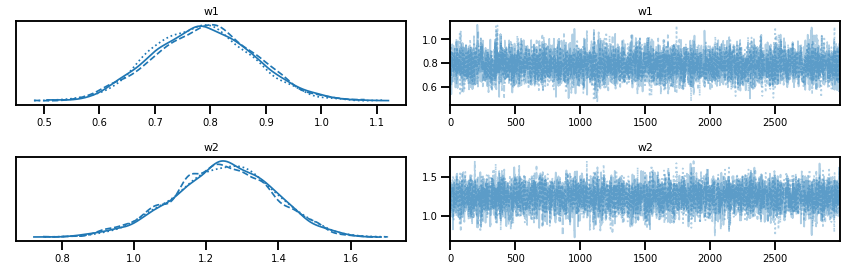

In [ ]:
az.plot_trace(trace);
plt.tight_layout()

In [ ]:
for var_info in az.rhat(trace).values():
  print(var_info.name, var_info.values.round(3), sep=' ')

w1 1.002
w2 1.002


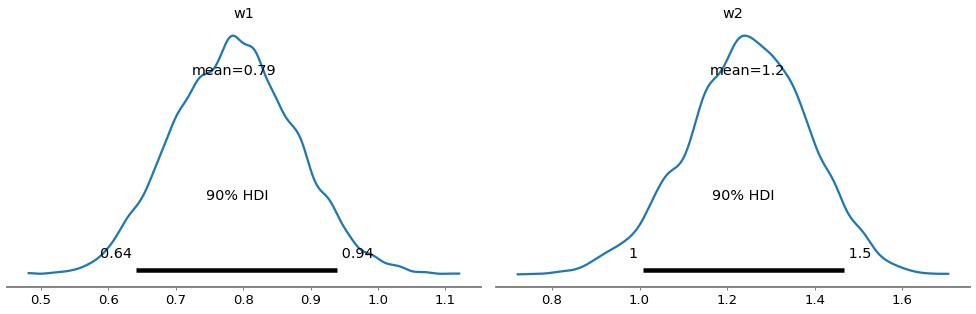

In [ ]:
az.plot_posterior(trace, hdi_prob=0.9);
plt.tight_layout()

In [ ]:
# 検証用データ
x_new = np.linspace(-3, 3, 10)

with model:
  # 検証用データをモデルへ入力
  pm.set_data({"x": x_new})
  # 予測分布からサンプリング
  pred = pm.sample_posterior_predictive(trace, samples=1000, random_seed=1)

y_pred_samples = pred['y']

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


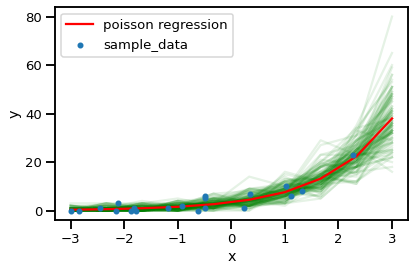

In [ ]:
# 予測分布からのサンプルを一部プロット
for i in range(0, 1000, 10):
    plt.plot(x_new, y_pred_samples[i,:], alpha=0.1, \
             zorder=i+1, color='green')
# 予測分布からのサンプルの平均値をプロット
plt.plot(x_new, y_pred_samples.mean(axis=0), alpha=1.0, \
         label='poisson regression', zorder=i+1, color='red')
# データ点をプロット
plt.scatter(x_data, y_data, marker='.', label='sample_data', zorder=i+2)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout();

In [ ]:
%load_ext watermark
%watermark --iversions

scipy     : 1.4.1
pandas    : 1.3.5
numpy     : 1.21.6
seaborn   : 0.11.2
arviz     : 0.12.1
IPython   : 5.5.0
matplotlib: 3.2.2
pymc3     : 3.11.4

